# Exploratory Data Analysis
---

<img src="https://github.com/soltaniehha/Business-Analytics/blob/master/figs/08-01-EDA.png?raw=true" width="600" align="center"/>

*Image from [Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

## Customer Churn

Also known as customer attrition, or customer turnover is the loss of clients or customers. Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new ones. 

Companies usually make a distinction between voluntary churn and involuntary churn. In most analyses involuntary churn is excluded. 

Predictive analytics uses machine learning to predict the likelihood of a customer churning. These models will identify a small subgroup of potential customers that are at a higher risk of abandoning the company. This empowers the company to focus on the subset of the customers who are most likely to churn and through customer retention marketing programs stop some of that to happen.

## Data

**Telco Customer Churn**

The data was downloaded from IBM Sample Data Sets: https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/

Each row represents a customer, each column contains customer's attributes described as below:

* **customerID**: Customer ID
* **gender**: Customer gender (female, male)
* **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
* **Partner**: Whether the customer has a partner or not (Yes, No)
* **Dependents**: Whether the customer has dependents or not (Yes, No)
* **tenure**: Number of months the customer has stayed with the company
* **PhoneService**: Whether the customer has a phone service or not (Yes, No)
* **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetService**: Customer's internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod**: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges**: The amount charged to the customer monthly
* **TotalCharges**: The total amount charged to the customer
* **Churn**: Whether the customer churned or not (Yes or No)

The data set includes information about:

* Customers who left - the column is called `Churn`
* Services that each customer has signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers - gender, age range, and if they have partners and dependents

We will be using Python and Seaborn library to plot and analyze the data.

**Basic information**:
* Only 7043 rows
* There are 21 columns with 19 features
* Only 11 missing values (next item).

Updating Seaborn as Colab is currently using an old version:

In [ ]:
#!pip install git+https://github.com/mwaskom/seaborn.git

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings

#warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")
df = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/Telco-Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Impute missing values

There are only 11 missing values, all of them for the TotalCharges column. These values are actually a blank space in the csv file (and not visible above) and are exclusive for customers with zero tenure. It's possible to concluded that they are missing due to the fact that the customer never paied anything to the company. We will impute this missing values with zero:

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

## Target variable

We are trying to predict if the client left the company in the previous month. Therefore we have a binary classification problem with a slightly unbalanced target:

In [ ]:
df[df['Churn'] == 'Yes'].shape[0] / df.shape[0]

0.2653698707936959

In [ ]:
df[df['Churn'] == 'No'].shape[0] / df.shape[0]

0.7346301292063041

* Churn: No   - 73.5%
* Churn: Yes  - 26.5%

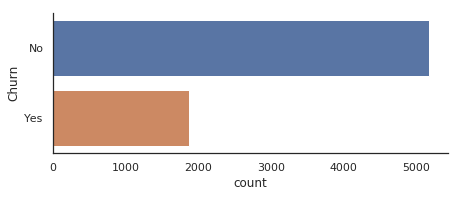

In [ ]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5)

## Getting insight using pivot tables

In [ ]:
df.pivot_table(values='MonthlyCharges', index=['Contract', 'MultipleLines'], columns='Churn', aggfunc='mean')

Churn                                   No        Yes
Contract       MultipleLines                         
Month-to-month No                53.480800  66.427051
               No phone service  37.070852  36.456536
               Yes               81.611184  87.889404
One year       No                50.103063  77.111017
               No phone service  44.883206  46.535714
               Yes               82.411377  95.886022
Two year       No                42.716743  67.695000
               No phone service  51.495253  50.466667
               Yes               75.054535  95.341429

In [ ]:
df.pivot_table(values='tenure', index='Contract', columns='Churn', aggfunc='mean')

Churn,No,Yes
Contract,,
Month-to-month,21.033333,14.016918
One year,41.674063,44.963855
Two year,56.602914,61.270833


From these pivot tables we can see that
* For all three types of contracts customers who churned were paying a higher monthly amount with the exception of the ones who didn't have a phone service.
* The tenure of the customers on a month-to-month contract is a major predictor

## Your turn

What kind of conclusion can you draw by creating a pivot table that uses `SeniorCitizen` and `Partner` as index and `Churn` as column to obtain the average `MonthlyCharges` for these subgroups?

In [ ]:
# Your answer goes here


Churn                         No        Yes
SeniorCitizen Partner                      
0             No       54.765930  69.495119
              Yes      62.130513  77.785032
1             No       75.786426  77.937590
              Yes      81.817067  84.610859

How about the same grouping but instead of 'mean' using 'count' for aggregation?

In [ ]:
# Your answer goes here


Churn                    No  Yes
SeniorCitizen Partner           
0             No       2150  922
              Yes      2358  471
1             No        291  278
              Yes       375  198

## Numerical features

There are only three numerical columns: tenure, monthly charges and total charges. The probability density distribution can be estimate using the seaborn kdeplot function. 

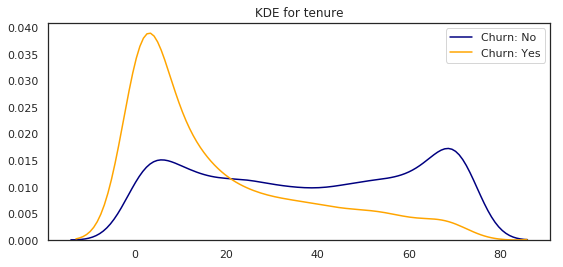

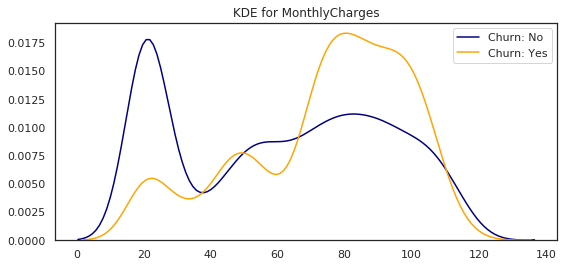

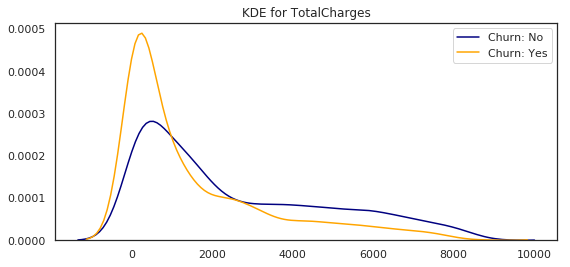

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:
* Recent clients are more likely to churn
* Clients with higher MonthlyCharges are also more likely to churn
* Tenure and MonthlyCharges are probably important features

In fact we can see some boundaries when we use scatter plots:

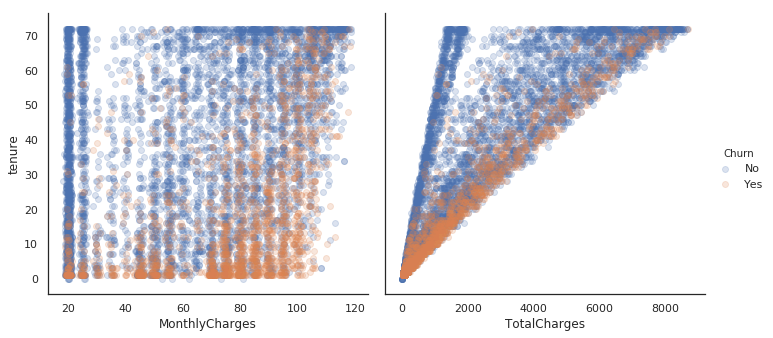

In [ ]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.2)
g.add_legend();

Another feature we can consider is the difference between the MonthlyCharges and the TotalCharges divided by the tenure:

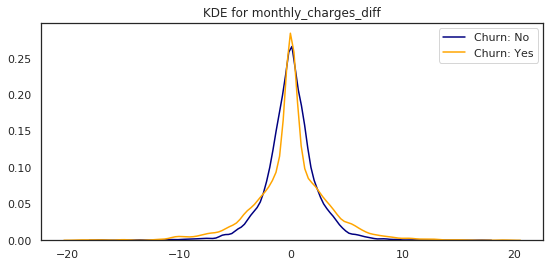

In [ ]:
# Calculate features
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure']
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff')

Not a promising feature at first glance, but it might be usefull when combined with categorical features.


## Categorical features

This dataset has 16 categorical features:

* Six binary features (Yes/No)
* Nine features with three unique values each (categories)
* One feature with four unique values

### Gender and Age (SeniorCitizen)

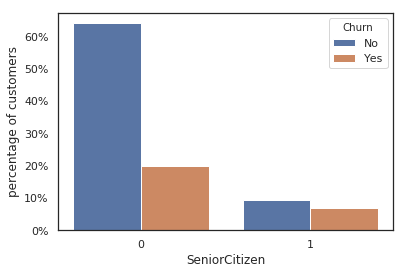

In [ ]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

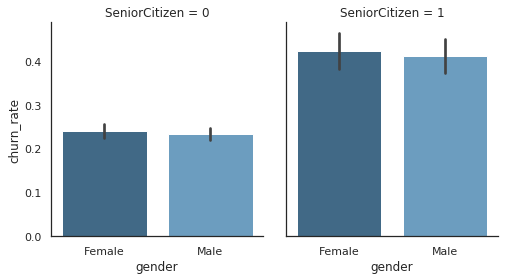

In [ ]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

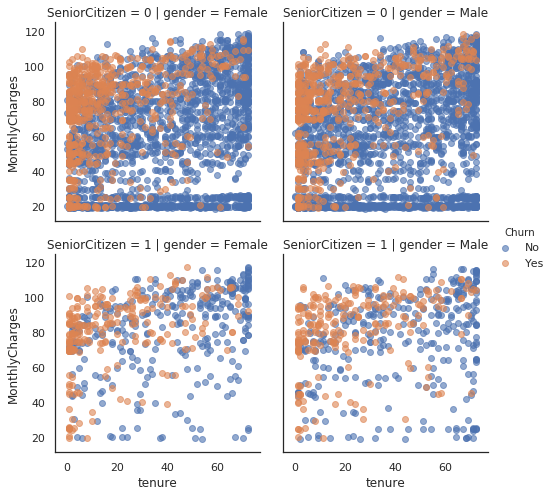

In [ ]:
g = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

* Gender is not an indicative of churn. 
* SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers. 
* There are no special relations between this categorical values and the main numerical features.

### Partner and dependents

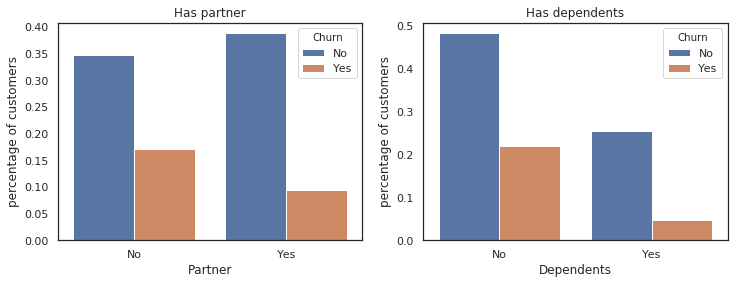

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

* Customers that don't have partners are more likely to churn
* Customers without dependents are also more likely to churn

### Phone and Internet services

Now let's look at the services that customers are using. There are only two main services: phone and internet but the former has many additionals like online backup and security.

<b>Phone services</b>

There are only two features here: if the client has phone and if he has more than one line. Both can be summed up in one chart:

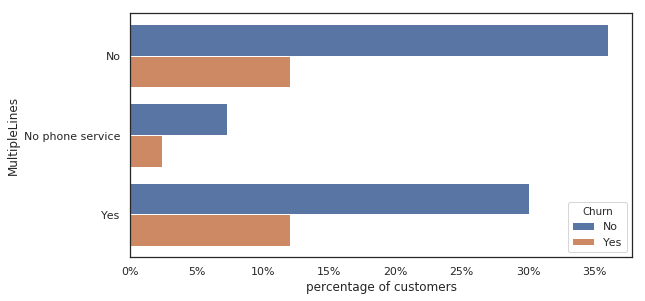

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

* Few customers don't have phone service
* Customers with multiple lines have a slightly higher churn rate

Let's see how multiple lines affects the monthly charges:

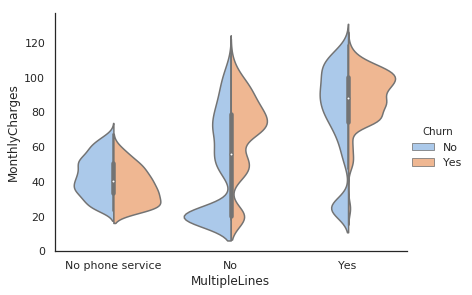

In [ ]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

<b>Internet services</b>

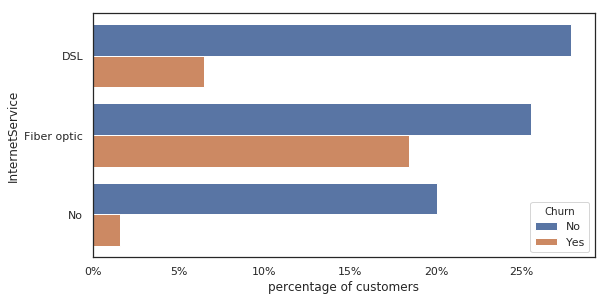

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

* Clients without internet have a very low churn rate
* Customers with fiber are more probable to churn than those with DSL connection

Comparing the Internet service with monthly charges:

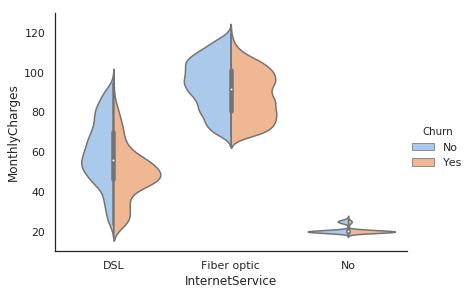

In [ ]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4);

It's interesting how customers with DSL (slower connection) and higher charges are less probable to churn. 

**Additional services**

There are six additional services for customers with internet:

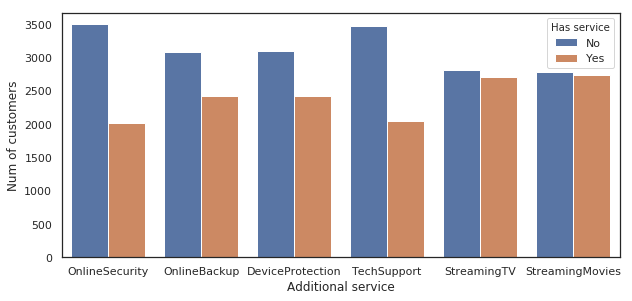

In [ ]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

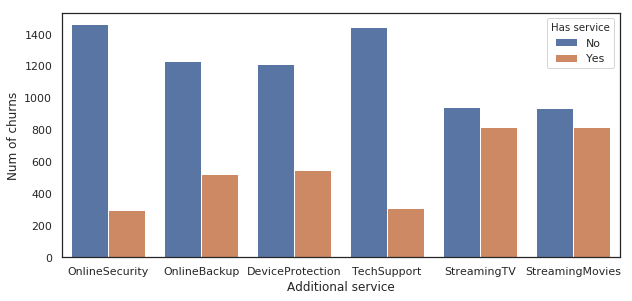

In [ ]:
plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

The first plot shows the total number of customers for each additional service, while the second shows the number of clients that churn. We can see that:

* Customers with the first 4 additionals (security to tech support) are more unlikely to churn
* Streaming service is not predictive for churn

### Contract and Payment

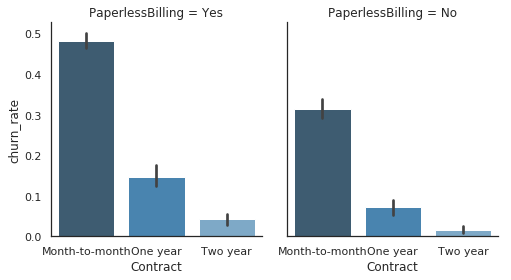

In [ ]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

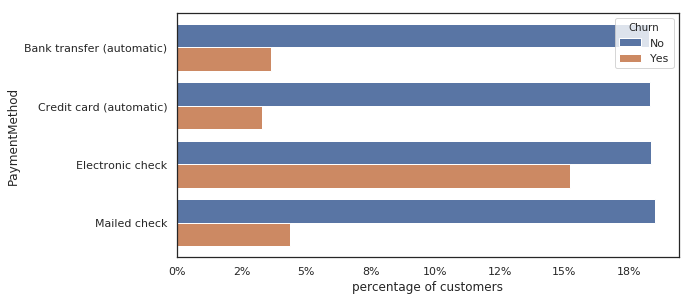

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

A few observations:
* Customers with paperless billing are more probable to churn
* The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate
* Short term contracts have higher churn rates

One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn. A time-series dataset would be better to understand this kind of behaviour. Now let's have a look at the relation with numerical features:

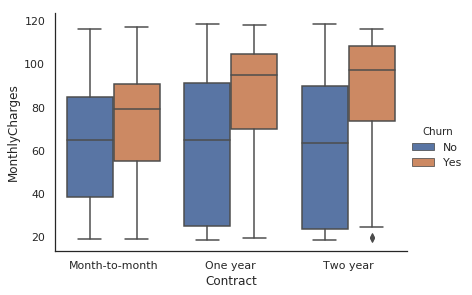

In [ ]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4.2, aspect=1.4)

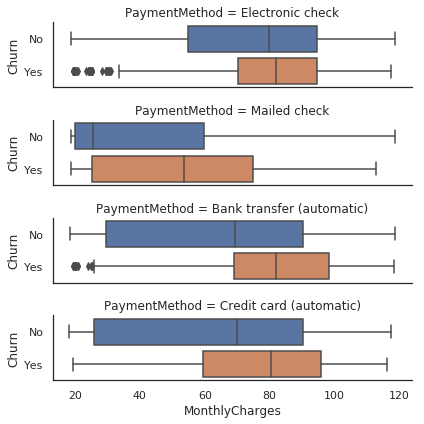

In [ ]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df, height=1.5, aspect=4, orient='h')

* Longer contracts are more affected by higher monthly charges (for churn rate).
* Mailed checks have lower charges
* There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check

## Correlation between features

Correlation heatmap (Pearson method)

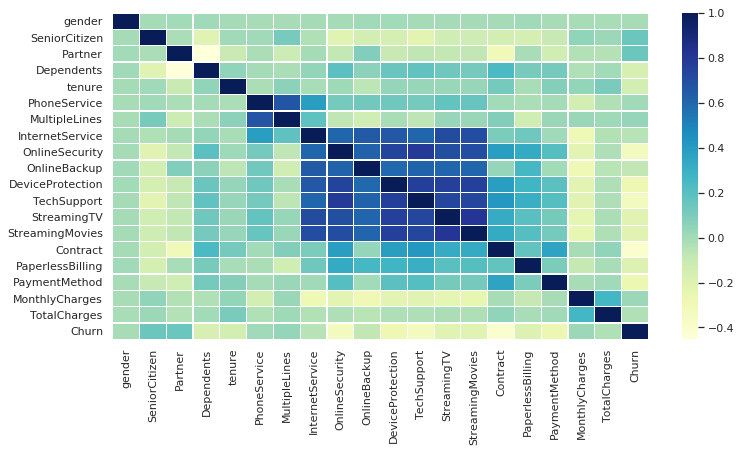

In [ ]:
plt.figure(figsize=(12, 6))
df.drop(['customerID', 'churn_rate', 'total_charges_to_tenure_ratio', 'monthly_charges_diff'],
        axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

## Feature Importance

To get some preliminary feature importances we will use the Random Forest classifier, a wellknown decision-tree based model.  I've used one-hot encoding to encode the categorical features and dropped the 'No' columns for binary features. I've also manually tested a few hyperparameters to get a better model.

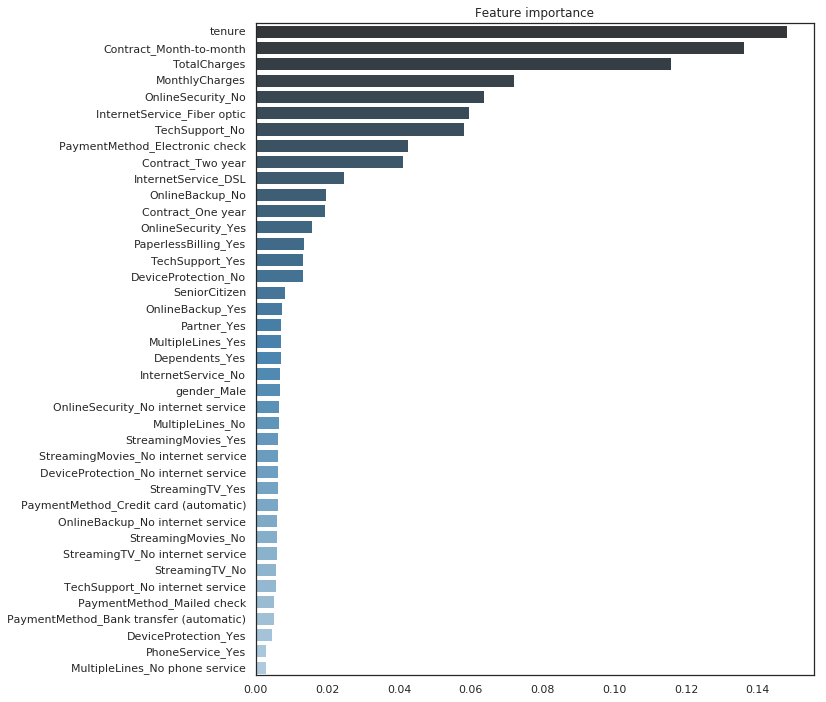

In [ ]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
df = pd.get_dummies(df)
# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
x, y = df.drop(drop,axis=1), df['Churn_Yes']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

The importances are in line with our previous analysis. The three numerical features are good predictors for churn, specially tenure. As we've seen, customers with Fiber optic are very likely to churn, while those with long term contracts are not. On the other hand, gender and streaming are not important features and It might be interesting to drop additional services with the label 'No internet service', since they are highly correlated.